In [3]:
import os

In [4]:
os.chdir("E:\Insofe\PH.D\PHD_ML")

In [5]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

df = pd.read_csv('Train-1554810061973.csv')
df = df[pd.notnull(df['Sentiment'])]
print(df.head(10))
print(df['reviewtext'].apply(lambda x: len(x.split(' '))).sum())

    Reviewid    Hotelid      userid          Date  \
0   Review_1  hotel_101  hotel_1608  Nov 16, 2007   
1   Review_2  hotel_101  hotel_6939  Oct 30, 2007   
2   Review_3  hotel_101  hotel_3976  Oct 12, 2007   
3   Review_4  hotel_101  hotel_2851  Aug 31, 2007   
4   Review_5  hotel_101  hotel_7897  Jul 18, 2007   
5   Review_6  hotel_101  hotel_3297  Jul 13, 2007   
6   Review_7  hotel_101  hotel_5463   Jul 4, 2007   
7   Review_8  hotel_101  hotel_9766  Jun 14, 2007   
8   Review_9  hotel_101  hotel_7042  Jun 13, 2007   
9  Review_10  hotel_101  hotel_9805  May 30, 2007   

                                          reviewtext  Sentiment  
0        Nice Marriot       View of my king bed room       good  
1  Good hotel, charges for internet access The Ma...       good  
2  Small but adequate rooms If you have an early ...       good  
3  Better than average, some noisy rooms I have s...       good  
4  Ordinary Although it is highly rated in these ...        bad  
5  Awesome for early

# Exploring the Data

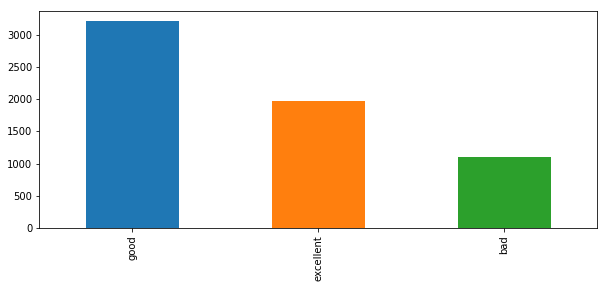

In [6]:
my_sentiments = ['bad','good','exellent']
plt.figure(figsize=(10,4))
df.Sentiment.value_counts().plot(kind='bar');

Classess are not balanced

In [7]:
def print_plot(index):
    print(index)
    example = df[df.index == index][['reviewtext', 'Sentiment']].values[0]
    print(example)
    if len(example) > 0:
        print(example[0])
        print('Sentiment:', example[1])       
print_plot(10)

10
['Very nice but expensive parking This hotel is very nicely renovated with a modern bar and beautiful indoor pool in the treed atrium. The staff was very friendly and helpful. The rooms are immaculately clean and the beds are extremely comfortable due to the nice linens and down pillows. My only concern was the expensive parking. It will run you $16 per day which I expect in L.A., but not Seattle. Other than that we had a wonderful stay and good food in the restaurant.'
 'good']
Very nice but expensive parking This hotel is very nicely renovated with a modern bar and beautiful indoor pool in the treed atrium. The staff was very friendly and helpful. The rooms are immaculately clean and the beds are extremely comfortable due to the nice linens and down pillows. My only concern was the expensive parking. It will run you $16 per day which I expect in L.A., but not Seattle. Other than that we had a wonderful stay and good food in the restaurant.
Sentiment: good


In [8]:
print_plot(30)

30
["A refreshing hotel! My mom and I stayed at Hotel Del Sol for a few nights while we were in San Francisco. The hotel was recommended to me and it didn't disappoint. The location was perfect - a few blocks from Union and Chestnut, walking distance to the ocean - and the ambiance was very refreshing. Small, basic rooms with bright colors and lots of character. An outdoor pool, parking and a small continental breakfast was also part of the deal. It definitely had a European feel and that may have been because it seemed to be mostly European travelers staying there. The price was incredibly reasonable and we'll definitely be back. It's nice to find a hotel that doesn't break the bank and isn't part of some boring ol' chain."
 'excellent']
A refreshing hotel! My mom and I stayed at Hotel Del Sol for a few nights while we were in San Francisco. The hotel was recommended to me and it didn't disappoint. The location was perfect - a few blocks from Union and Chestnut, walking distance to th

# Text Pre-processing


In [9]:
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['reviewtext'] = df['reviewtext'].apply(clean_text)
print_plot(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
10
['nice expensive parking hotel nicely renovated modern bar beautiful indoor pool treed atrium staff friendly helpful rooms immaculately clean beds extremely comfortable due nice linens pillows concern expensive parking run 16 per day expect la seattle wonderful stay good food restaurant'
 'good']
nice expensive parking hotel nicely renovated modern bar beautiful indoor pool treed atrium staff friendly helpful rooms immaculately clean beds extremely comfortable due nice linens pillows concern expensive parking run 16 per day expect la seattle wonderful stay good food restaurant
Sentiment: good


In [10]:
df['reviewtext'].apply(lambda x: len(x.split(' '))).sum()

546593

In [30]:
df.head(4)

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",nice marriot view king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007",good hotel charges internet access marriott ai...,good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",small adequate rooms early morning flight catc...,good
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007",better average noisy rooms stayed hotel times ...,good


In [ ]:
df$Date as.Date(df$review_date, format = "%d-%B-%y")

In [11]:
X = df.reviewtext
y = df.Sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Naive Bayes Classifier for Multinomial Models

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_sentiments))

accuracy 0.5182829888712241
              precision    recall  f1-score   support

         bad       1.00      0.01      0.01       346
        good       0.81      0.02      0.04       575
    exellent       0.52      1.00      0.68       966

   micro avg       0.52      0.52      0.52      1887
   macro avg       0.78      0.34      0.24      1887
weighted avg       0.69      0.52      0.36      1887



In [13]:
# SVM

In [14]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_sentiments))


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


accuracy 0.6687864334923158
              precision    recall  f1-score   support

         bad       0.87      0.51      0.65       346
        good       0.69      0.43      0.53       575
    exellent       0.63      0.87      0.73       966

   micro avg       0.67      0.67      0.67      1887
   macro avg       0.73      0.60      0.64      1887
weighted avg       0.69      0.67      0.65      1887



Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_sentiments))

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.6391096979332274
              precision    recall  f1-score   support

         bad       0.75      0.63      0.68       346
        good       0.57      0.56      0.56       575
    exellent       0.65      0.69      0.67       966

   micro avg       0.64      0.64      0.64      1887
   macro avg       0.65      0.63      0.64      1887
weighted avg       0.64      0.64      0.64      1887



Word2vec and Logistic Regression

In [16]:
from gensim.models import Word2Vec
wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [17]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [18]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [22]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['reviewtext']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['reviewtext']), axis=1).values

X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

C:\Users\prash\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['Sentiment'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.Sentiment))
print(classification_report(test.Sentiment, y_pred,target_names=my_sentiments))

C:\Users\prash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.679915209326974
              precision    recall  f1-score   support

         bad       0.76      0.73      0.74       346
        good       0.62      0.55      0.58       575
    exellent       0.68      0.74      0.71       966

   micro avg       0.68      0.68      0.68      1887
   macro avg       0.69      0.67      0.68      1887
weighted avg       0.68      0.68      0.68      1887

